In [6]:
import numpy as np 
import joblib
import seaborn as sns
from pylab import rcParams
import subprocess
import matplotlib.pyplot as plt
from matplotlib import rc
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from seqeval.metrics import classification_report, f1_score, precision_score, recall_score
from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from conlleval import evaluate
import warnings
warnings.filterwarnings("ignore")

def output_all_results(predictions, gold): 
    print(evaluate(gold, predictions))

def output_covered_entities(predictions, gold): 
    new_preds = []
    for pred, truth in zip(predictions, gold): 
        if pred != 'O' and truth != 'O': 
            new_preds.append(truth)
        else: 
            new_preds.append(pred)

    
    print(evaluate(gold, new_preds))
    

def output_all(file_name, delimiter=' '):
    
    pred_ents,gold_ents,  predictions, gold = [], [], [], []
    
    with open(file_name, 'r', encoding='utf-8') as f: 
        for line in f: 
            if line != '\n':
                line = line.strip().split(delimiter)
                predictions.append(line[2])
                gold.append(line[1])
                pred_ents.append(line[2].replace('B-', '').replace('I-', ''))
                gold_ents.append(line[1].replace('I-', '').replace('B-', ''))
    print("Output all results: \n")
    output_all_results(predictions, gold)
    print("\nOutput covered entities results: \n")
    output_covered_entities(predictions, gold)

    fig, ax = plt.subplots(figsize=(16, 12))
    plot_confusion_matrix(gold, predictions, ax=ax)
    
    fig, ax = plt.subplots(figsize=(16, 12))
    plot_confusion_matrix(gold_ents, pred_ents, ax=ax)
    
    

    


In [8]:
!python conlleval.py < est_ner_data/test_eval.txt

[('B-Nimi', 231), ('O', 14502), ('I-Nimi', 158), ('B-Aadress', 73), ('B-Asutus', 53), ('I-Asutus', 39), ('I-Aadress', 28)]
[('B-Nimi', 299), ('O', 14566), ('I-Nimi', 173), ('B-Aadress', 266), ('B-Asutus', 150), ('I-Asutus', 79), ('I-Aadress', 42)]
processed 15575 tokens with 715 phrases; found: 465 phrases; correct: 342.
accuracy:  57.68%; (non-O)
accuracy:  96.85%; precision:  73.55%; recall:  47.83%; FB1:  57.97
          Aadress: precision:  60.19%; recall:  23.31%; FB1:  33.60  103
           Asutus: precision:  50.00%; recall:  30.67%; FB1:  38.02  92
             Nimi: precision:  86.67%; recall:  78.26%; FB1:  82.25  270


## PPA model evaluation 

### New NER data

Output all results: 

dict_items([('B-Nimi', 231), ('I-Nimi', 158), ('O', 13613), ('B-Aadress', 73), ('I-Aadress', 28), ('B-Asutus', 53), ('I-Asutus', 39)])
dict_items([('B-Nimi', 299), ('I-Nimi', 173), ('O', 13677), ('B-Aadress', 266), ('I-Aadress', 42), ('B-Asutus', 150), ('I-Asutus', 79)])
processed 14686 tokens with 715 phrases; found: 465 phrases; correct: 342.
accuracy:  57.68%; (non-O)
accuracy:  96.66%; precision:  73.55%; recall:  47.83%; FB1:  57.97
          Aadress: precision:  60.19%; recall:  23.31%; FB1:  33.60  103
           Asutus: precision:  50.00%; recall:  30.67%; FB1:  38.02  92
             Nimi: precision:  86.67%; recall:  78.26%; FB1:  82.25  270
(73.54838709677419, 47.83216783216783, 57.96610169491525)

Output covered entities results: 

dict_items([('B-Nimi', 247), ('I-Nimi', 159), ('O', 13613), ('B-Aadress', 117), ('I-Aadress', 33), ('B-Asutus', 70), ('I-Asutus', 53)])
dict_items([('B-Nimi', 299), ('I-Nimi', 173), ('O', 13677), ('B-Aadress', 266), ('I-Aadr

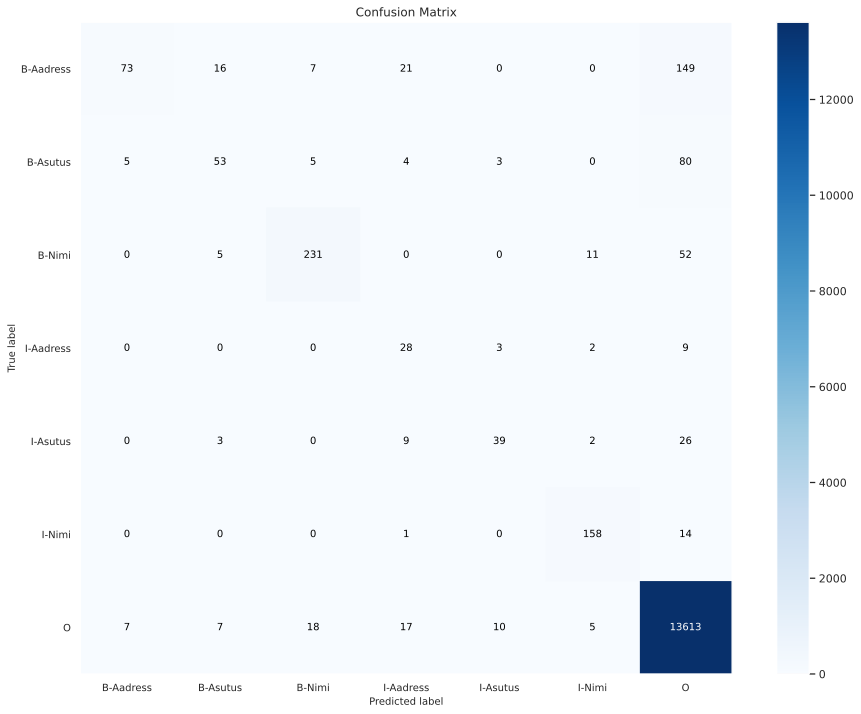

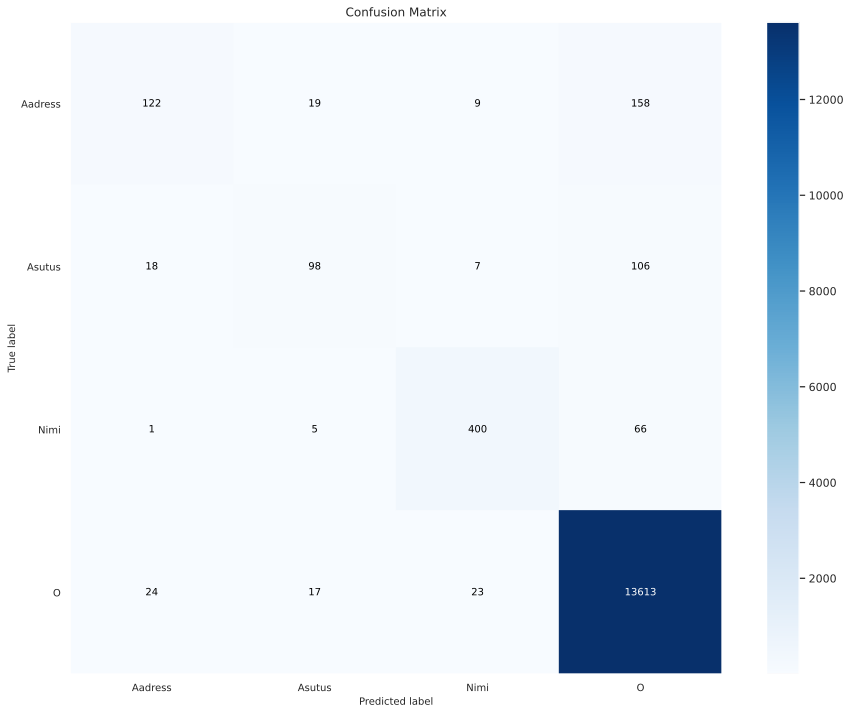

In [15]:
output_all('est_ner_data/test_eval.txt')


Output all results: 

dict_items([('O', 25814), ('B-Nimi', 515), ('I-Nimi', 337), ('B-Asutus', 157), ('I-Asutus', 126), ('B-Aadress', 165), ('I-Aadress', 29)])
dict_items([('B-Aadress', 584), ('O', 25906), ('B-Nimi', 840), ('I-Nimi', 361), ('B-Asutus', 427), ('I-Asutus', 192), ('I-Aadress', 60)])
processed 28370 tokens with 1851 phrases; found: 986 phrases; correct: 799.
accuracy:  53.94%; (non-O)
accuracy:  95.68%; precision:  81.03%; recall:  43.17%; FB1:  56.33
          Aadress: precision:  60.09%; recall:  22.43%; FB1:  32.67  218
           Asutus: precision:  74.37%; recall:  34.66%; FB1:  47.28  199
             Nimi: precision:  91.39%; recall:  61.90%; FB1:  73.81  569
(81.03448275862068, 43.165856293895196, 56.32710609799083)

Output covered entities results: 

dict_items([('O', 25814), ('B-Nimi', 564), ('B-Aadress', 202), ('I-Nimi', 340), ('B-Asutus', 198), ('I-Asutus', 140), ('I-Aadress', 31)])
dict_items([('B-Aadress', 584), ('O', 25906), ('B-Nimi', 840), ('I-Nimi', 361),

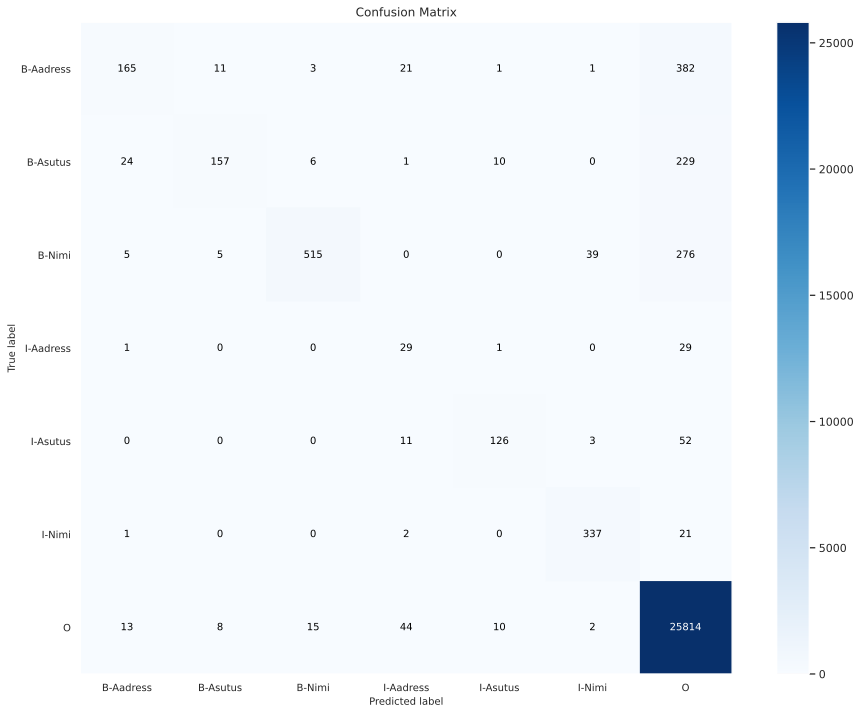

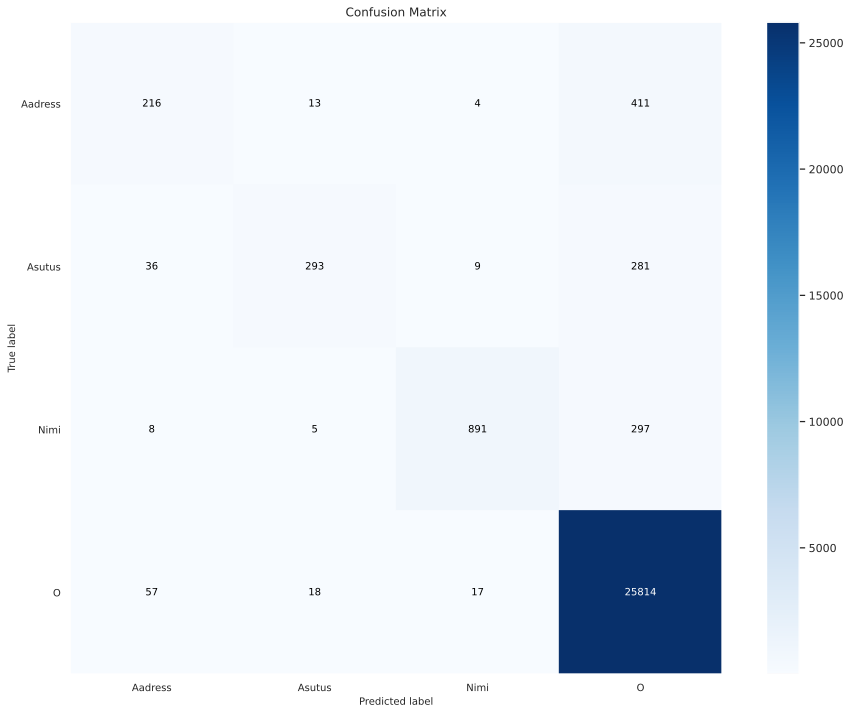

In [17]:
output_all('est_ner_data/test_eval_old_correct.txt')


## Elisa model 

Output all results: 

dict_items([('B-Nimi', 209), ('I-Nimi', 134), ('O', 13645), ('B-Aadress', 112), ('I-Aadress', 6), ('I-Asutus', 4), ('B-Asutus', 13)])
dict_items([('B-Nimi', 300), ('I-Nimi', 174), ('O', 13675), ('B-Aadress', 266), ('I-Aadress', 42), ('B-Asutus', 150), ('I-Asutus', 79)])
processed 14686 tokens with 716 phrases; found: 399 phrases; correct: 307.
accuracy:  47.28%; (non-O)
accuracy:  96.17%; precision:  76.94%; recall:  42.88%; FB1:  55.07
          Aadress: precision:  80.30%; recall:  39.85%; FB1:  53.27  132
           Asutus: precision:  30.00%; recall:   6.00%; FB1:  10.00  30
             Nimi: precision:  81.01%; recall:  64.00%; FB1:  71.51  237
(76.94235588972431, 42.877094972067034, 55.067264573991025)

Output covered entities results: 

dict_items([('B-Nimi', 220), ('I-Nimi', 134), ('O', 13645), ('B-Aadress', 120), ('B-Asutus', 30), ('I-Aadress', 6), ('I-Asutus', 5)])
dict_items([('B-Nimi', 300), ('I-Nimi', 174), ('O', 13675), ('B-Aadress', 266), ('I-Aadre

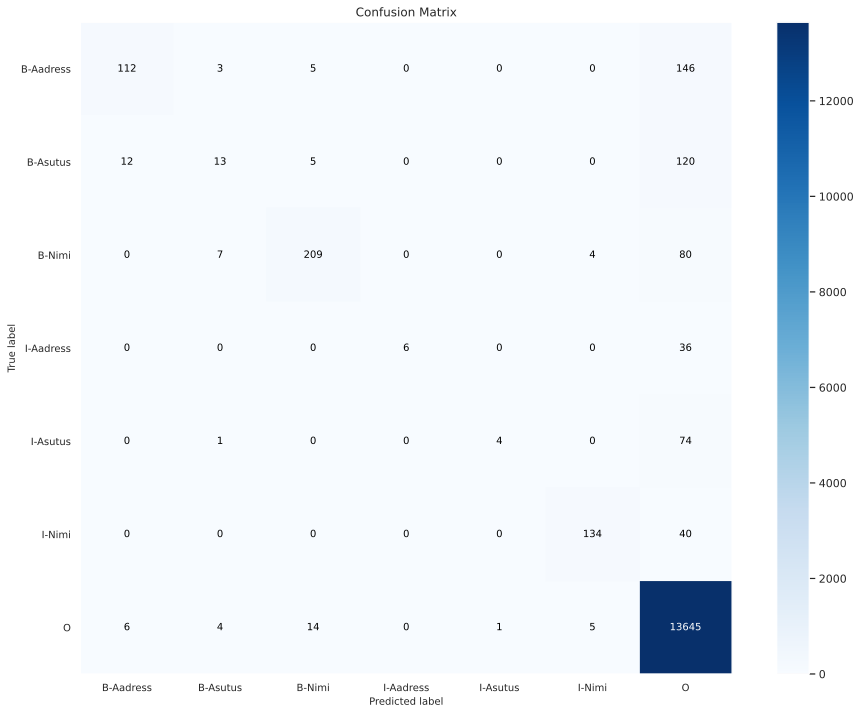

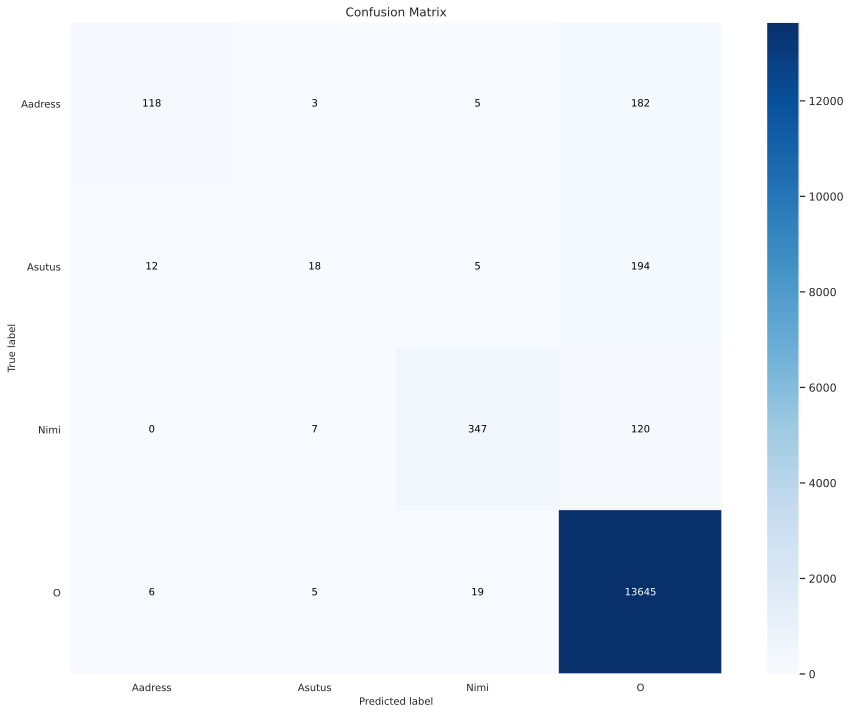

In [19]:
output_all('est_ner_data/test_eval_elisa.txt')


Output all results: 

processed 28370 tokens with 1851 phrases; found: 997 phrases; correct: 749.
accuracy:  48.78%; (non-O)
accuracy:  95.40%; precision:  75.13%; recall:  40.46%; FB1:  52.60
          Aadress: precision:  78.21%; recall:  52.23%; FB1:  62.63  390
           Asutus: precision:  43.93%; recall:  17.80%; FB1:  25.33  173
             Nimi: precision:  84.79%; recall:  43.81%; FB1:  57.77  434
(75.12537612838516, 40.464613722312265, 52.59831460674158)

Output covered entities results: 

processed 28370 tokens with 1851 phrases; found: 1002 phrases; correct: 828.
accuracy:  53.33%; (non-O)
accuracy:  95.80%; precision:  82.63%; recall:  44.73%; FB1:  58.04
          Aadress: precision:  89.30%; recall:  54.28%; FB1:  67.52  355
           Asutus: precision:  54.21%; recall:  24.12%; FB1:  33.39  190
             Nimi: precision:  89.28%; recall:  48.57%; FB1:  62.91  457
(82.63473053892216, 44.73257698541329, 58.044164037854884)


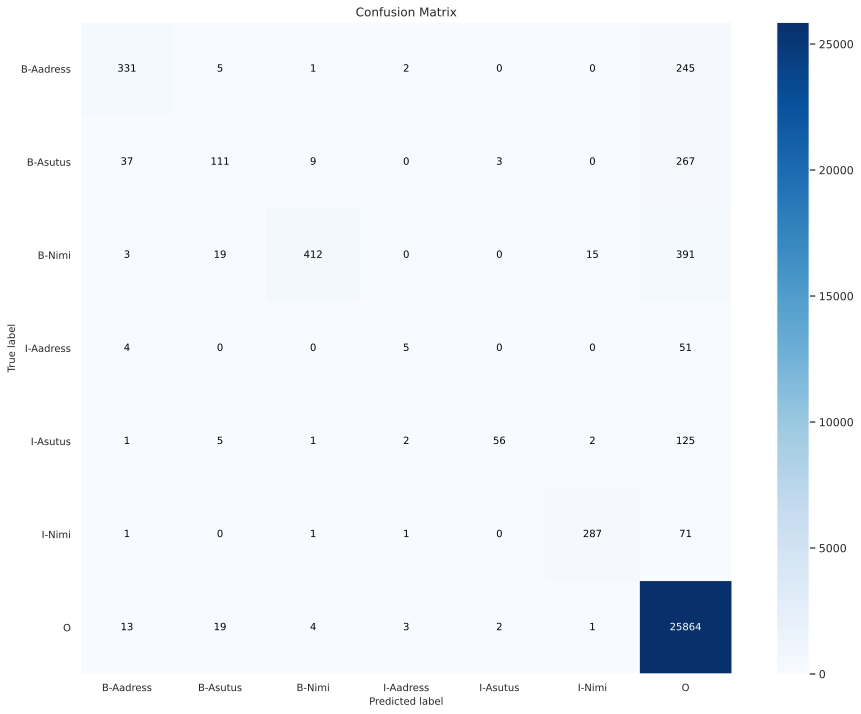

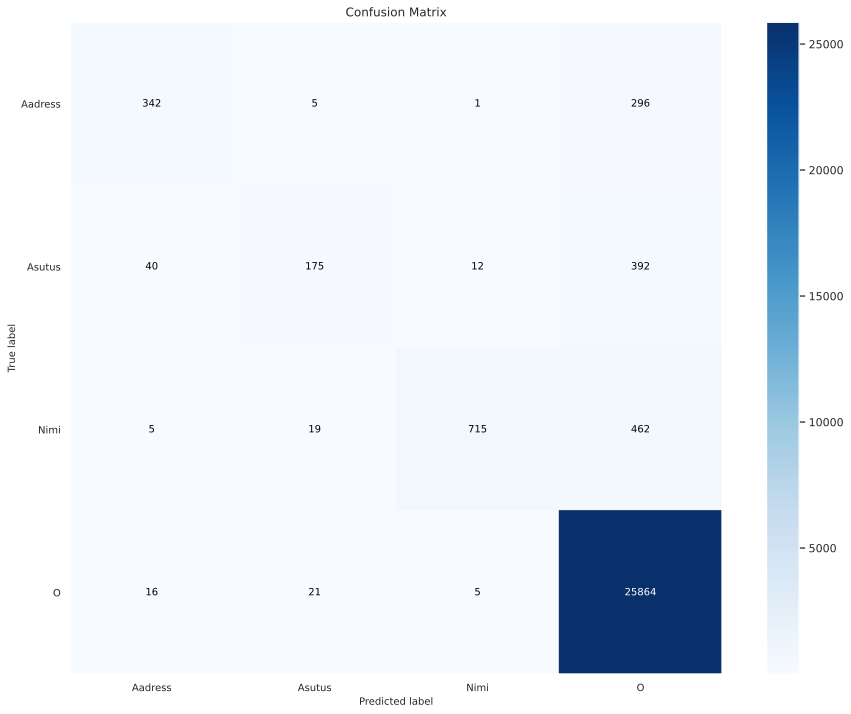

In [4]:
output_all('est_ner_data/test_eval_old_elisa_correct.txt')


## PPA finetuned 

Output all results: 

processed 94935 tokens with 1633 phrases; found: 1785 phrases; correct: 1306.
accuracy:  86.30%; (non-O)
accuracy:  99.26%; precision:  73.17%; recall:  79.98%; FB1:  76.42
          Aadress: precision:  72.80%; recall:  80.98%; FB1:  76.67  386
           Asutus: precision:  67.31%; recall:  84.87%; FB1:  75.08  725
             Nimi: precision:  79.67%; recall:  75.53%; FB1:  77.55  674
(73.16526610644257, 79.9755052051439, 76.41895845523699)

Output covered entities results: 

processed 94935 tokens with 1633 phrases; found: 1800 phrases; correct: 1465.
accuracy:  93.38%; (non-O)
accuracy:  99.44%; precision:  81.39%; recall:  89.71%; FB1:  85.35
          Aadress: precision:  77.40%; recall:  85.88%; FB1:  81.42  385
           Asutus: precision:  78.42%; recall:  91.65%; FB1:  84.52  672
             Nimi: precision:  86.14%; recall:  90.01%; FB1:  88.03  743
(81.38888888888889, 89.71218616044091, 85.34809204777163)


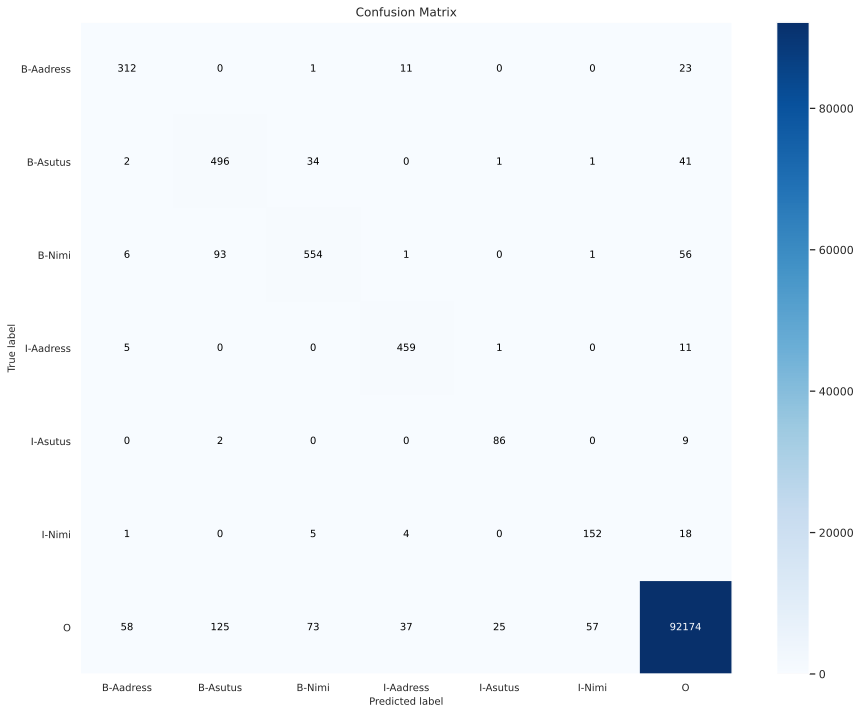

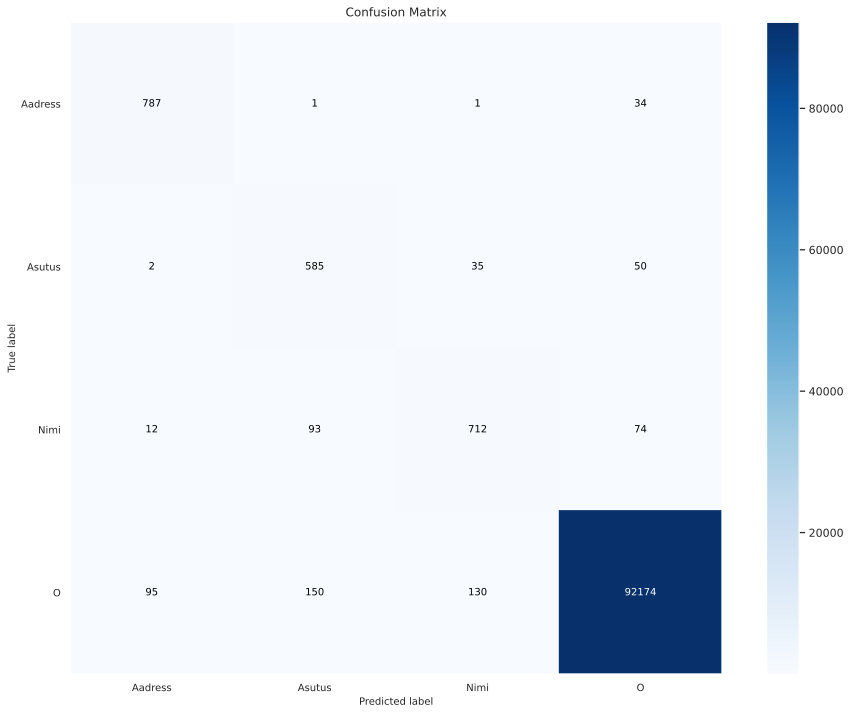

In [7]:
output_all('elisa_new_data/test_eval_ft.txt')
